In [2]:
using Pkg; Pkg.activate()

  Activating project at `~/.julia/environments/v1.11`


In [3]:
using Revise

In [10]:
using Distributions
using DataStructures
using DensityInterface
using Newtrinos

In [192]:
Revise.revise(Newtrinos)

[ Info: (cuinit = HeterogeneousComputing.CPUnit(), precision = Float64, rng = Random123.Philox4x{UInt64, 10}(0x0f7e8c4c6d91d820, 0x29f62634f800d31c, 0x3450cfcea1418f6d, 0x8c1b666d5c6b3216, 0x4b78576de81c6070, 0x00782c9e6663a7ef, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), ad = ADTypes.AutoZygote())
┌ Warning: Replacing docs for `Newtrinos.find_mle :: Tuple{Any, Any, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Newtrinos.profile :: NTuple{4, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243
┌ Warning: Replacing docs for `Newtrinos.scan :: NTuple{4, Any}` in module `Newtrinos`
└ @ Base.Docs docs/Docs.jl:243


true

In [193]:
osc = Newtrinos.osc.standard

Newtrinos.osc.standard

In [194]:
modules = [Newtrinos.dayabay]

1-element Vector{Module}:
 Newtrinos.dayabay

In [207]:
llh, param_dict, prior_dict = Newtrinos.generate_likelihood_observed(modules, osc)

(LogFuncDensity(Newtrinos.var"#423#429"{Vector{Newtrinos.var"#422#428"{Module, typeof(Newtrinos.osc.standard.osc_prob), Vector{Float64}}}}(Newtrinos.var"#422#428"{Module, typeof(Newtrinos.osc.standard.osc_prob), Vector{Float64}}[Newtrinos.var"#422#428"{Module, typeof(Newtrinos.osc.standard.osc_prob), Vector{Float64}}(Newtrinos.dayabay, Newtrinos.osc.standard.osc_prob, [18388.160000000003, 24005.38, 33680.240000000005, 41465.35, 47637.770000000004, 52942.16, 54914.549999999996, 55474.310000000005, 54295.79, 51504.69  …  23443.870000000003, 18945.02, 15003.310000000001, 11523.35, 8862.91, 6213.89, 4414.6900000000005, 2892.5299999999997, 1834.24, 2128.56])])), OrderedDict{Any, Any}(:θ₁₂ => 0.5872523687443223, :θ₁₃ => 0.1454258194533693, :θ₂₃ => 0.8556288707523761, :δCP => 1.0, :Δm²₂₁ => 7.53e-5, :Δm²₃₁ => 0.0024752999999999997), OrderedDict{Any, Any}(:θ₁₂ => Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), :θ₁₃ => Uniform{Float64}(a=0.1, b=0.2), :θ₂₃ => Uniform{Float64}(a=0.5

In [208]:
prior_dict[:θ₁₃] = Uniform(0.135, 0.16)
prior_dict[:Δm²₃₁] = Uniform(0.00225, 0.0028)

Uniform{Float64}(a=0.00225, b=0.0028)

In [209]:
for var in [:θ₁₂, :δCP, :Δm²₂₁, :θ₂₃]
    prior_dict[var] = param_dict[var]
end

In [210]:
prior_dict

OrderedDict{Any, Any} with 6 entries:
  :θ₁₂   => 0.587252
  :θ₁₃   => Uniform{Float64}(a=0.135, b=0.16)
  :θ₂₃   => 0.855629
  :δCP   => 1.0
  :Δm²₂₁ => 7.53e-5
  :Δm²₃₁ => Uniform{Float64}(a=0.00225, b=0.0028)

In [211]:
vars_to_scan = (θ₁₃ = 30, Δm²₃₁ = 30)

(θ₁₃ = 30, Δm²₃₁ = 30)

In [212]:
result = Newtrinos.profile(llh, prior_dict, vars_to_scan, param_dict);

In [113]:
using CairoMakie

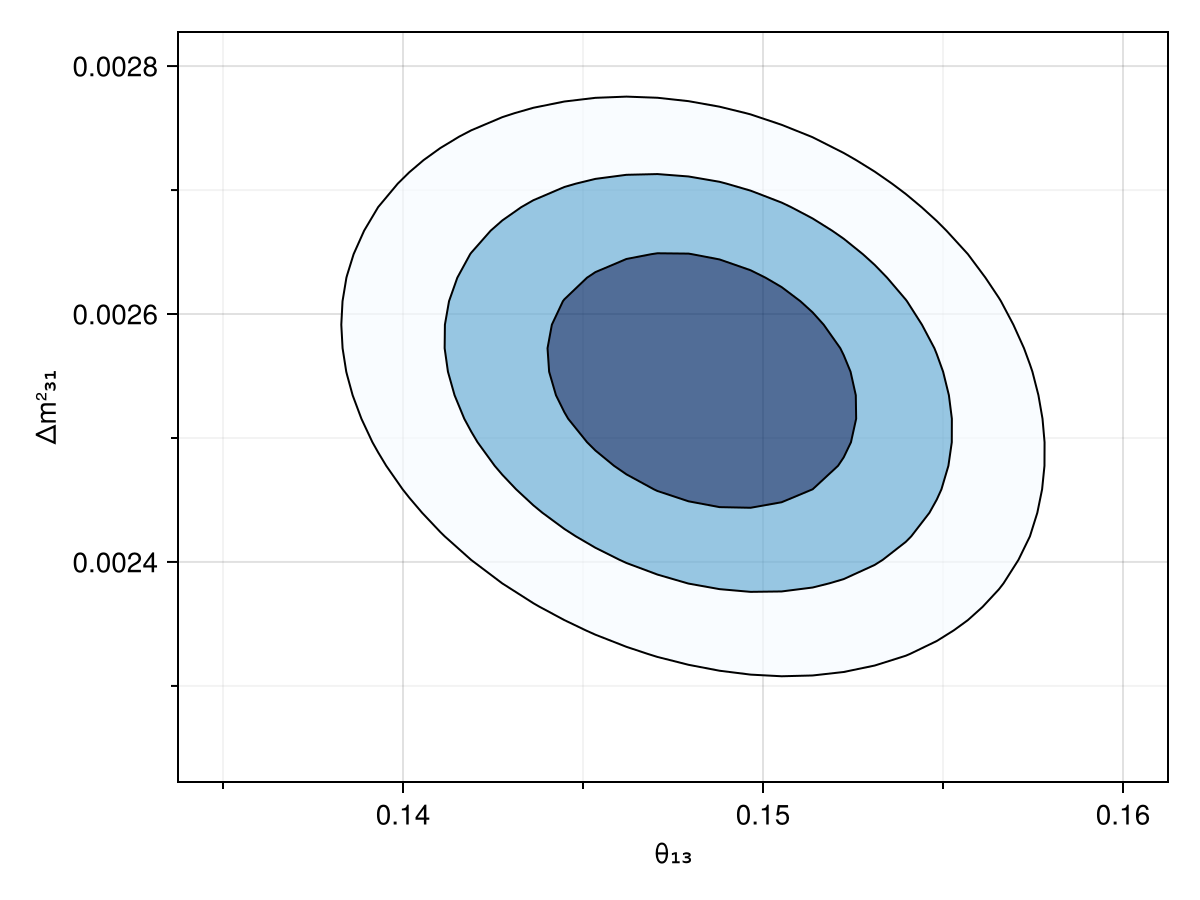

In [213]:
plot(result)

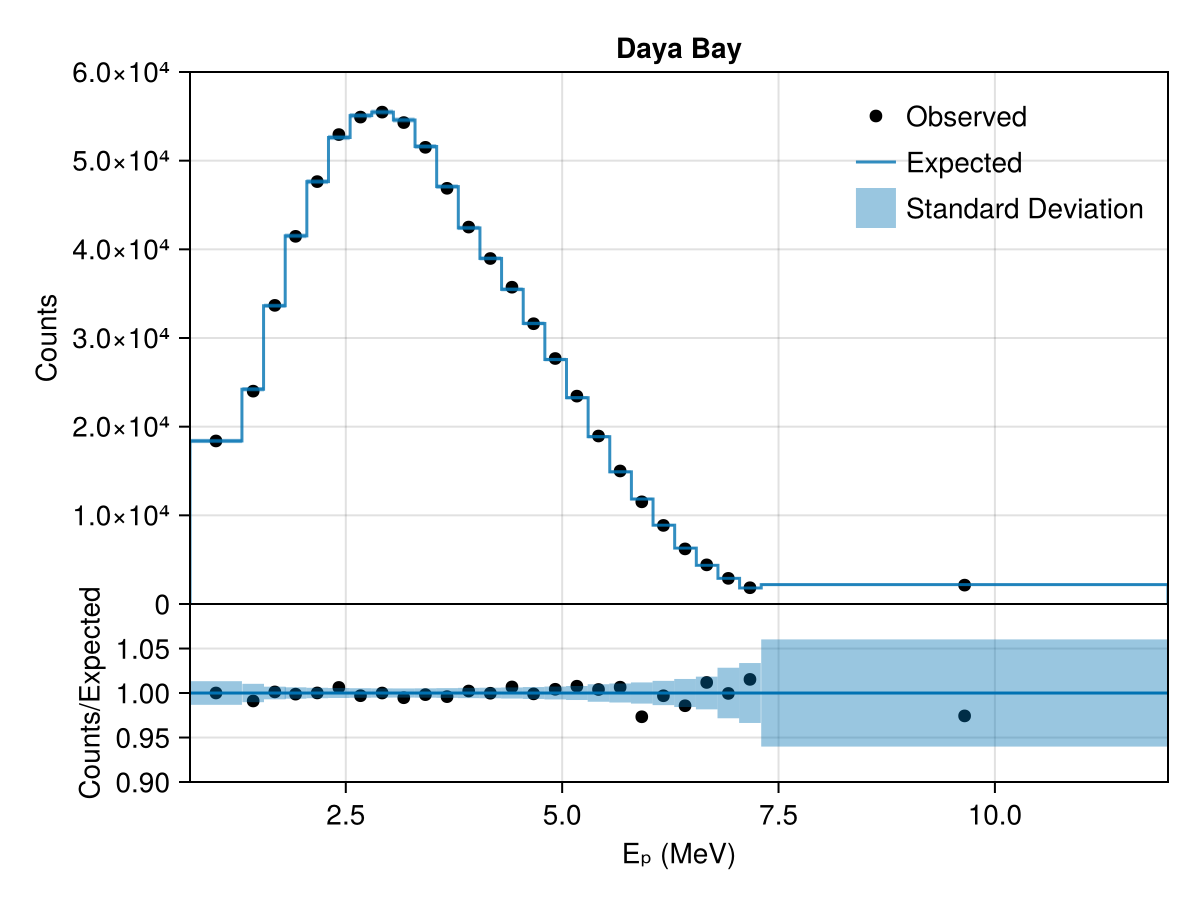

In [214]:
Newtrinos.dayabay.plot(Newtrinos.bestfit(result), osc.osc_prob)